<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/Ejer1-3-second-method_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
%matplotlib inline

### Lectura de datos


In [3]:
# Load data
df = pd.read_csv('https://drive.google.com/uc?id=1XiPaHHEQRZ5rGwtTalpfDRxpxRS7vgWW',names=['HorasEstudio','Aprueba'])

print(df)

   HorasEstudio  Aprueba
0             2        0
1             3        0
2             4        0
3             5        0
4             6        1
5             7        1
6             8        1
7             9        1
8            10        1


La probabilidad de aprobar es  p = .66 y la de no es  f = 1 - p = .33



In [5]:
from sklearn.linear_model import LogisticRegression

independent_variables = ['HorasEstudio']
x = df[independent_variables]       # independent variable
y = df['Aprueba']                      # dependent variable

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(C=10)
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)

print("coef",model.coef_)
print("intercept",model.intercept_)

# predict_proba will return array containing proability of y = 0 and y = 1
print( model.predict_proba(x)[:,1])

# predict will give convert the probability(y=1) values > .5 to 1 else 0
print (model.predict(x))



coef [[2.67570118]]
intercept [-14.71626805]
[8.56748381e-05 1.24277552e-03 1.77499475e-02 2.07878309e-01
 7.92150806e-01 9.82253135e-01 9.98757444e-01 9.99914340e-01
 9.99994101e-01]
[0 0 0 0 1 1 1 1 1]


### Compute the Cost Function $J(\theta)$ and Gradient

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [15]:
rows = df.shape[0]
cols = df.shape[1]
scores = df[['HorasEstudio']].values
results = df['Aprueba'].values
X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)
print(X.shape)
print(y.shape)

(9, 2)
(9, 1)


In [16]:
def logistic_function(x):
    return 1/ (1 + np.exp(-x))

In [17]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient

### Cost and Gradient at Initialization

In [18]:
theta_init = np.zeros((cols , 1))
cost, gradient = compute_cost(theta_init, X, y)
print(X[0:3,])

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)
print(theta_init)

[[1. 2.]
 [1. 3.]
 [1. 4.]]
Cost at initialization 0.6931471805599453
Gradient at initialization: [[-0.05555556]
 [-1.44444444]]
[[0.]
 [0.]]


### Gradient Descent

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [19]:
import math
def gradient_descent(x, y, theta, alpha, iterations,epsilon):
    costs = []
    prev = math.inf
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        costs.append(cost)
        if(abs(costs[i]-prev) < epsilon):
            print("Convergencia Alcanzada !", i ," iteraciones")
            break
        prev = costs[i]
        theta -= (alpha * gradient)
    return theta, costs

In [20]:
theta, costs = gradient_descent(X, y, theta_init, 0.001, 2000000,1e-7)

Convergencia Alcanzada ! 403253  iteraciones


In [21]:
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[-10.24075172]
 [  1.89255879]]
Resulting cost: 0.08861428522911761


Plot $J(\theta)$ against the number of iterations of gradient descent:

<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-945701765.py:3: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel("J$(\Theta)$")


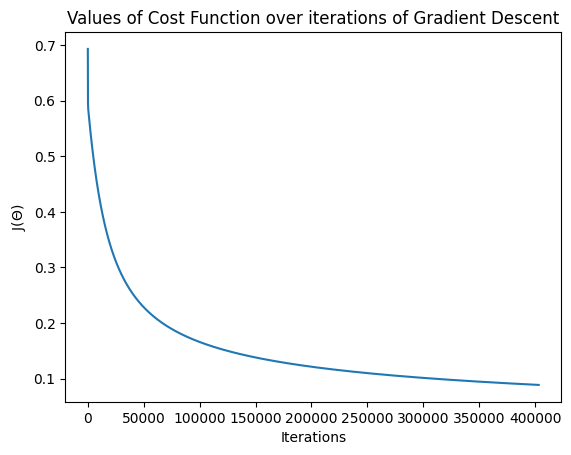

In [31]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("J$(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

### Predictions using the optimized $\theta$ values

$h_\theta(x) = x\theta$

In [23]:
def predict(theta, x):
    results = x.dot(theta)
    return results > 0


In [26]:
p = predict(theta, X)
print("Training Accuracy:", sum(p==y)[0],"%")

Training Accuracy: 9 %


In [27]:
test = np.array([50,79])
test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))
print("A person who scores 50 and 79 on their DMV written tests have a",
      np.round(probability[0], 2),"probability of passing.")

NameError: name 'mean_scores' is not defined

In [ ]:
from sklearn import metrics

# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y, model.predict(x)))
print ("AUC :", metrics.roc_auc_score(y, model.predict_proba(x)[:,1]))

print ("Confusion matrix :",metrics.confusion_matrix(y, model.predict(x)))
print ("classification report :", metrics.classification_report(y, model.predict(x)))

Accuracy : 1.0
AUC : 1.0
Confusion matrix : [[4 0]
 [0 5]]
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



### Plot ROC curve

ROC AUC: 1.00


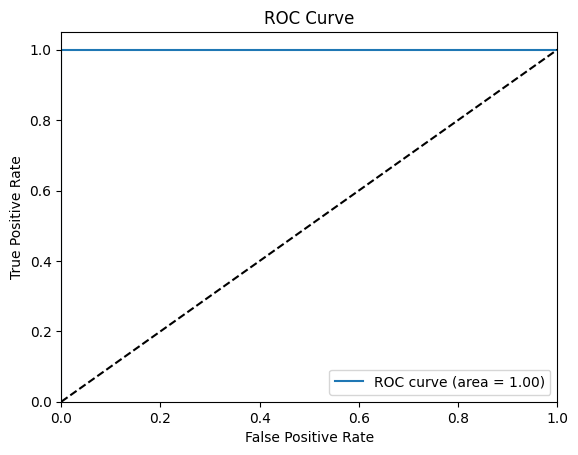

In [ ]:
# Determine the false positive and true positive rates
fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(x)[:,1])

# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
def add_ones(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [ ]:
#función sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
#xálculo de la hypòtesis
def calc_h(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return h

In [ ]:
print(x.shape[1])

1


In [ ]:
XX = add_ones(x)
n_cols=x.shape[1]
print(n_cols)
theta = np.zeros((n_cols+1,n_cols))
h = calc_h(XX, theta)

1


In [ ]:
print(XX)
print(theta)
print(h)

[[ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]
[[0.]
 [0.]]
[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]


In [ ]:
cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
print(cost)

0.6931471805599453


In [ ]:
m = y.size
alpha = 0.001


In [ ]:
print(theta)

[0. 0.]


## Entrenamiento del modelo

a fin de encontrar los coeficientes del modelo, es decir los elementos del vector $\theta$, debemos proceder a realizar el gradiente descendente de forma iterativa

In [ ]:
gradient = np.dot(XX.T, (h - y)) / m
theta -= alpha * gradient

In [ ]:
import  math
num_iter = 6000000
epsilon = 10e-6
J_vals = []
prev = math.inf
for i in range(num_iter):
    h = calc_h(XX, theta)
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    J_vals.append(cost)
    if(abs( J_vals[i]- prev) < epsilon) :
            print("Convergencia Alcanzada !", i ," iteraciones")
            break
    prev = J_vals[i]
    gradient = np.dot(XX.T, (h - y)) / m
    theta -= alpha * gradient
    #if i % 20000 == 0:
    #   print('iteracion ',i,'coste ', cost)

print('Adjusted coefficient: {}'.format(theta))
print("cost: {}".format(J_vals[i]))

ValueError: operands could not be broadcast together with shapes (2,) (2,9) (2,) 

## Variación de la función de pérdida

In [ ]:
plt.plot(range(len(J_vals)), J_vals)